In [1]:
from NeuralNetwork import Perceptron, ANN, Activation, Loss, train_test_val_split, create_mini_batches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

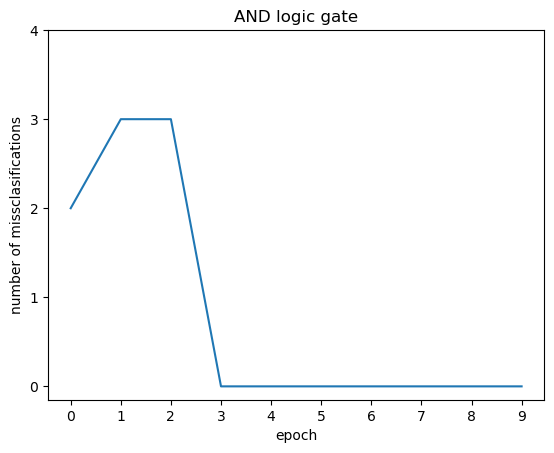

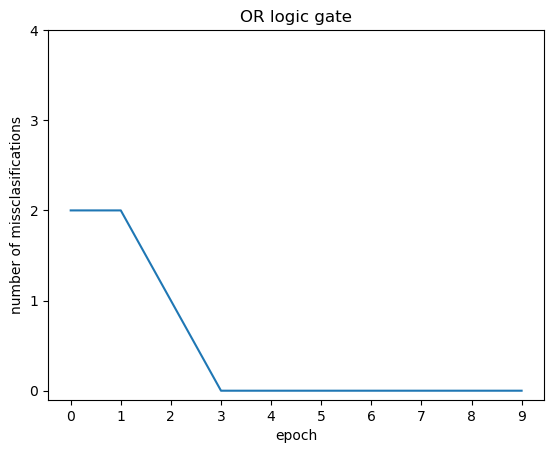

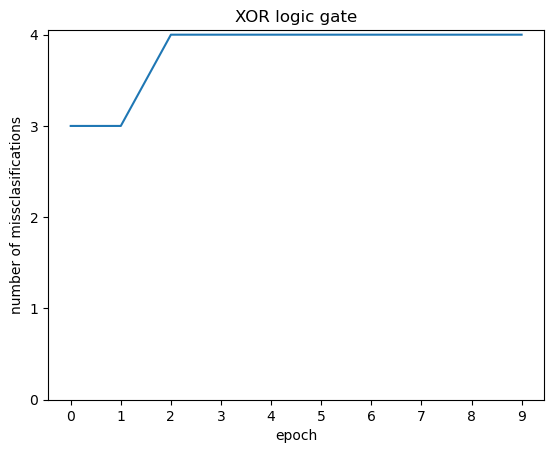

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
# testing softmax function
assert np.allclose(Activation().softmax(np.array([3.0, 1.0, 0.2])), np.array([0.8360188, 0.11314284, 0.05083836]))

assert np.allclose(Activation().softmax(np.array([[1, 2, 3], 
                                                  [2, 4, 8], 
                                                  [3, 5, 7],
                                                  [6, 6, 6]])), 
                                        np.array([[0.09003057, 0.24472847, 0.66524096],
                                                  [0.00242826, 0.01794253, 0.97962921],
                                                  [0.01587624, 0.11731043, 0.86681333],
                                                  [0.33333333, 0.33333333, 0.33333333]]))

In [6]:
features = pd.read_csv("../data/features.txt", sep = ',', header = None).to_numpy()
targets = pd.read_csv("../data/targets.txt", sep = ',', header = None).to_numpy()

In [7]:
x_train, x_test, x_val, y_train, y_test, y_val = train_test_val_split(features, targets, 0.6, 0.2)

In [8]:
print(features)

[[ 0.57855    0.82114    1.2148    ...  0.92471    0.24418    0.063001 ]
 [-0.022322   0.47681    0.55624   ...  1.0584     0.68453    0.99877  ]
 [ 0.057631   0.0017896  0.95442   ...  0.20707    0.40055    0.2335   ]
 ...
 [ 0.53833    0.16903    0.79056   ...  0.298      0.76012    1.2506   ]
 [ 0.73106    0.48718    0.64578   ...  0.78159    0.78677    0.48252  ]
 [ 1.1326     0.50078    0.93334   ...  0.58395    1.1942     0.61762  ]]


In [9]:
ann = ANN([10, 7], 1.0, [Activation(1.0, 0.1).LReLU, Activation().softmax], Loss().categorical_cross_entropy, number_of_features = 10)
for i in ann.weights:   print(i.shape)
ann.predict(features)

(11, 10)
(11, 7)


array([1, 5, 1, ..., 5, 5, 5], dtype=int64)

In [10]:
num_of_batches = 32

batches = create_mini_batches(x_train, y_train, num_of_batches)
print(batches)
print("Created: ", len(batches), " batches")
print(len(x_train) / num_of_batches)

[(array([[ 0.69557  ,  0.65694  ,  0.86946  ,  0.56034  ,  0.29314  ,
         0.89788  ,  0.30694  ,  0.27519  ,  0.71407  ,  0.54255  ],
       [ 0.82213  ,  0.15278  ,  0.65645  ,  0.42198  ,  0.3579   ,
         0.68841  ,  1.0994   ,  0.4571   ,  0.69966  ,  0.38147  ],
       [-0.16367  ,  0.34256  ,  0.50463  ,  0.64802  ,  0.67767  ,
         0.019372 ,  1.1661   ,  0.34839  ,  0.24575  ,  1.0839   ],
       [ 0.66579  ,  0.68829  ,  0.87732  ,  0.71069  ,  0.48471  ,
         0.69792  ,  0.21397  ,  0.91579  ,  0.36534  ,  0.32258  ],
       [ 0.41955  ,  0.22317  ,  0.64401  ,  0.86961  ,  0.89937  ,
         0.29161  , -0.012756 ,  0.22574  ,  0.7316   ,  1.0996   ],
       [ 0.33731  ,  0.39438  ,  0.59641  ,  0.94863  ,  0.58085  ,
         0.58703  , -0.088212 ,  0.47026  ,  1.0217   ,  0.39338  ],
       [ 0.78318  ,  0.41609  ,  0.36808  ,  0.82862  ,  0.69327  ,
        -0.048759 ,  1.3769   ,  0.37886  ,  0.74012  ,  0.60418  ],
       [ 0.91074  ,  0.51493  ,  0.3404

In [11]:
# Run feed_forward for the 1st data point
alphas, zetas = ann.feed_forward([features[0]])

In [12]:
print(len(alphas), len(zetas))
print("Alphas:", alphas)
print("Zetas:", zetas)

3 2
Alphas: [[array([ 0.57855 ,  0.82114 ,  1.2148  ,  0.72998 ,  0.34868 ,  0.99462 ,
       -0.018461,  0.92471 ,  0.24418 ,  0.063001])], array([[ 0.69490874,  0.34774761, -0.54765796, -0.45687068,  0.1877271 ,
        -0.28065318, -0.21949364, -0.17874667, -0.57829028, -0.10855346]]), array([[0.17876455, 0.08791697, 0.08021449, 0.16536233, 0.16510603,
        0.15510887, 0.16752675]])]
Zetas: [array([[ 0.69490874,  0.34774761, -0.54765796, -0.45687068,  0.1877271 ,
        -0.28065318, -0.21949364, -0.17874667, -0.57829028, -0.10855346]]), array([[ 0.22085977, -0.4888169 , -0.58050562,  0.14292923,  0.14137812,
         0.07891749,  0.15593326]])]
